Resumo de Estudo Sobre Algoritmos de Aprendizagem Supervisionada

Por Thiago Barros

Com Base no Livro: Mãos A Obra - Aprendizagem de Máquina com Scikit Learning e Tensor Flow

Capítulo 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Ao todo, são 20640 linhas com 10 variáveis de entrada

In [7]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

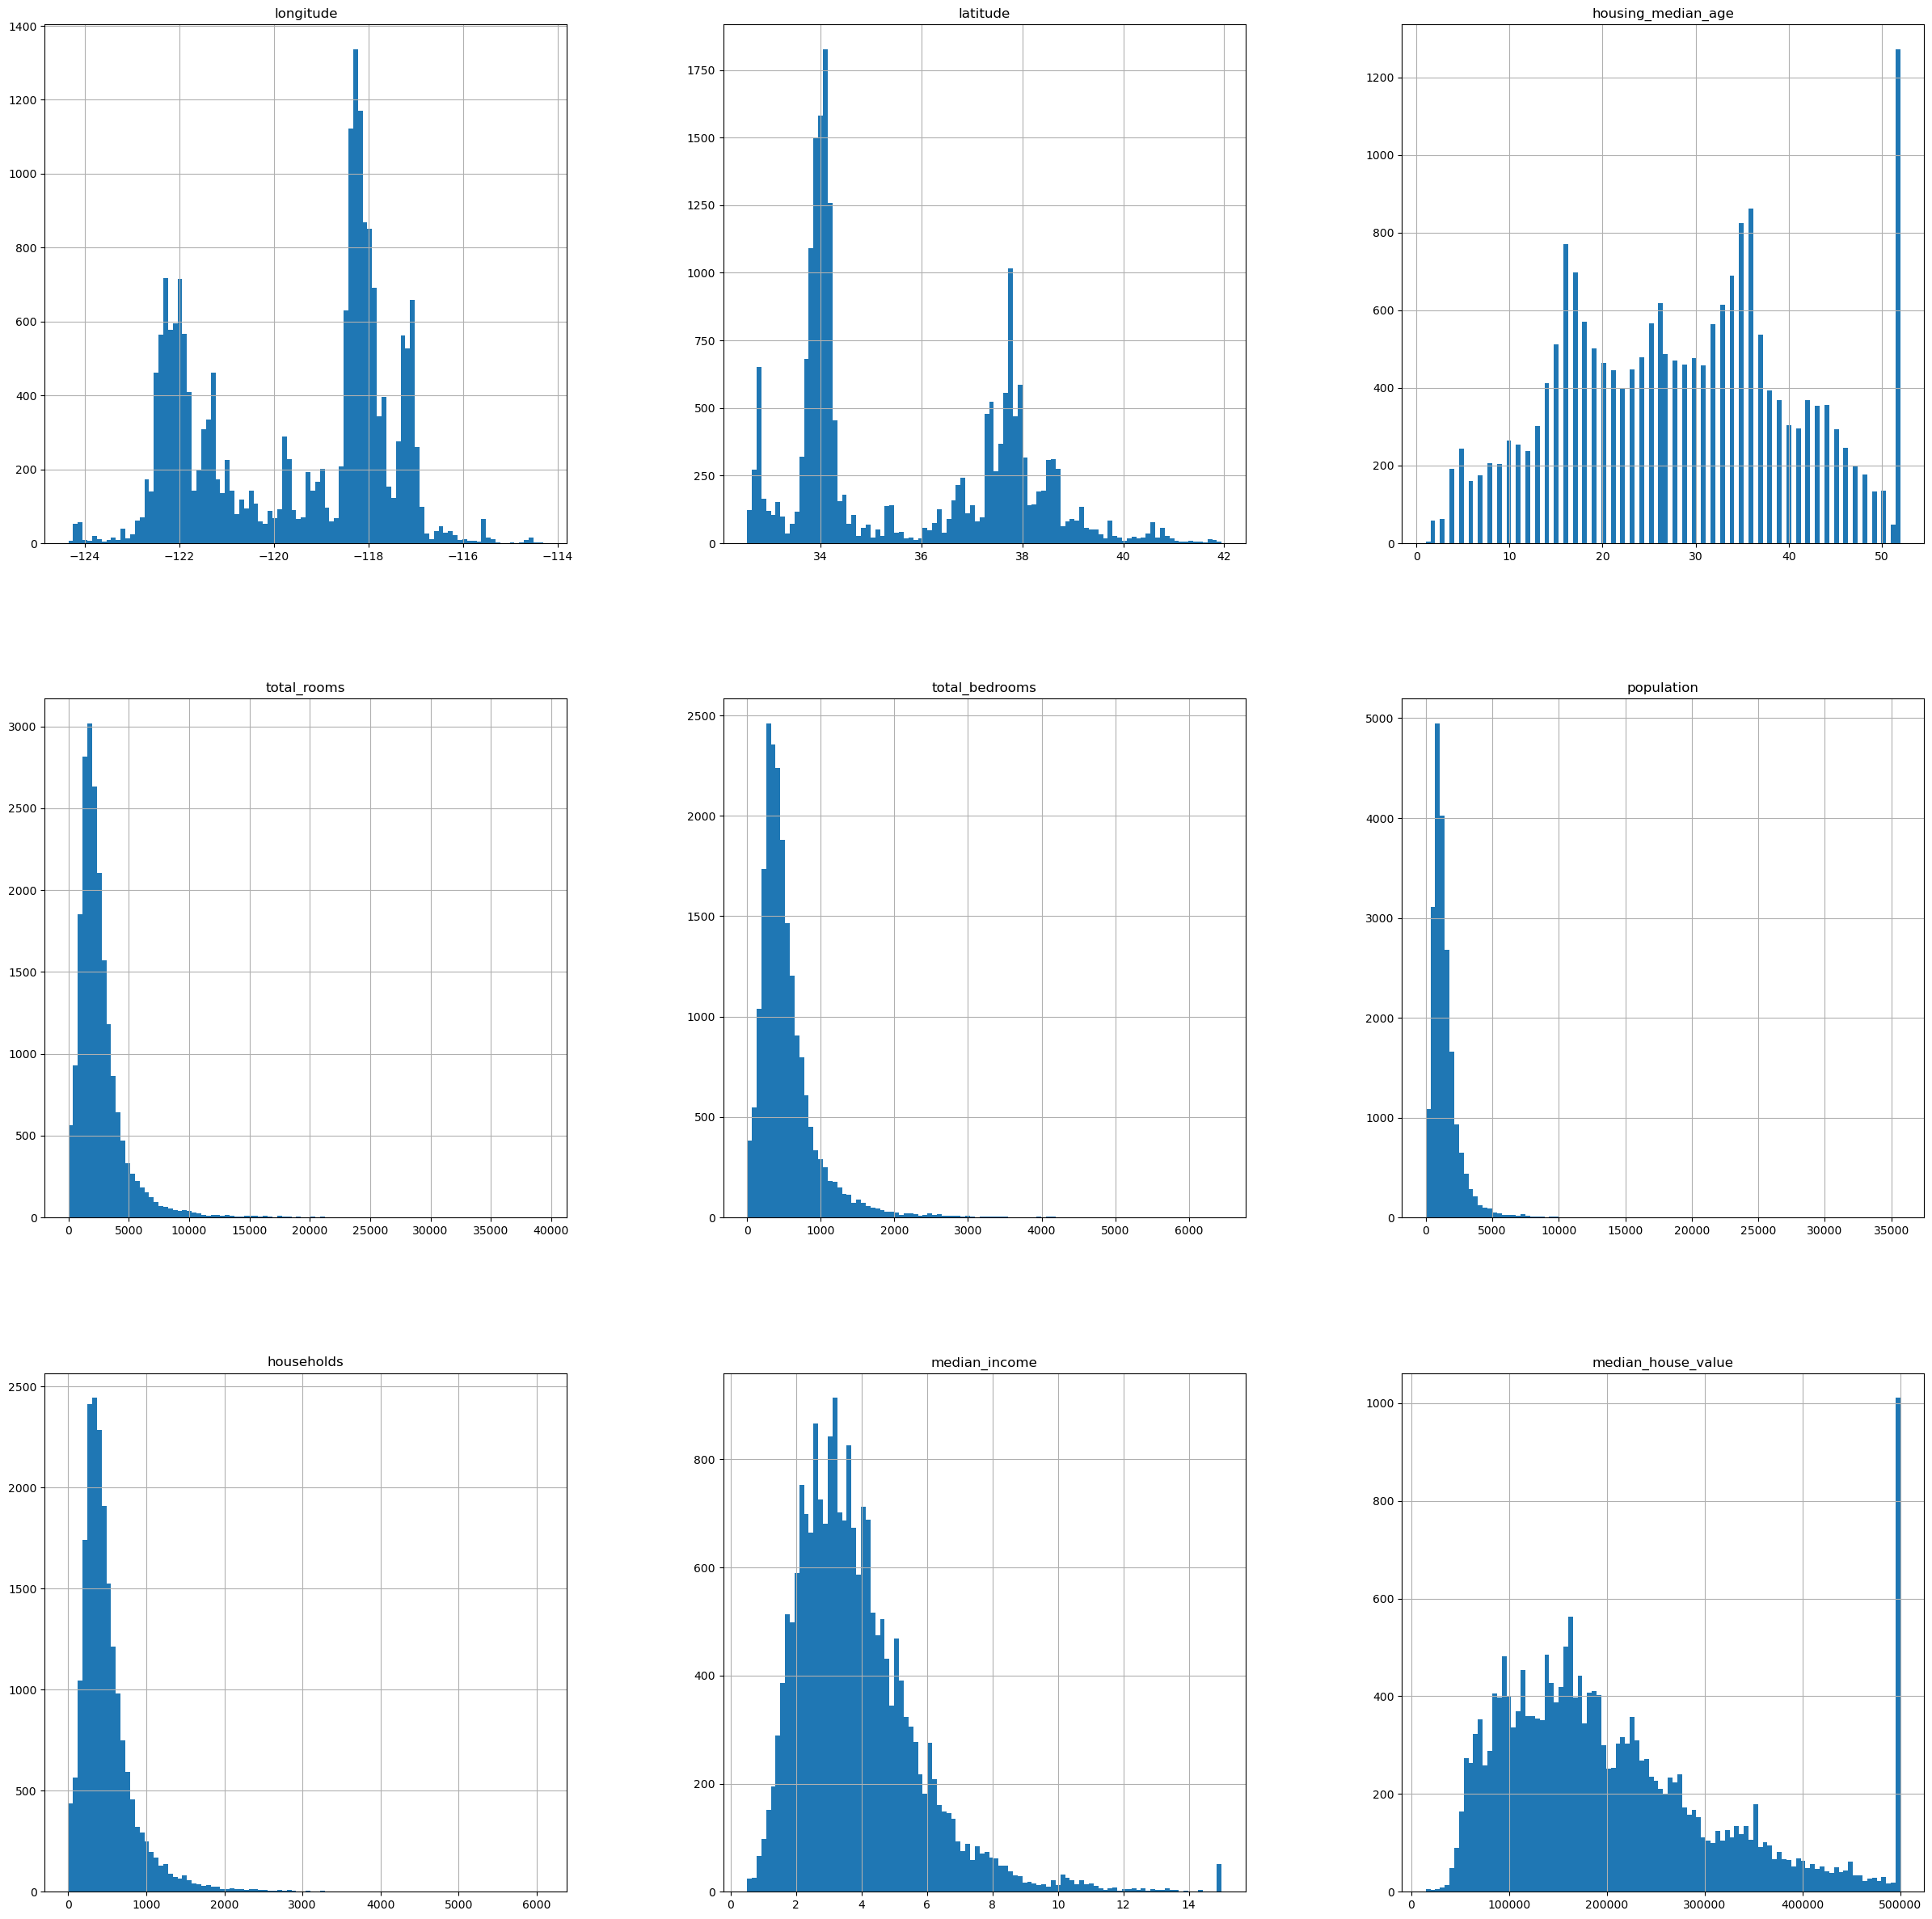

In [8]:
df.hist(bins=100,figsize=(30,30))
plt.show()        

In [9]:
# Criando um conjunto de teste
# Vamos utilizar aleatoriamente 20% das amostras para fazer a verificação do modelo

total_linhas = int(0.2*len(df))
print(f'Amostra de Teste: {total_linhas}')

def amostra_teste(dataframe,percentual):
    """
    Função para selecionar as amostras aleatórias do dataframe e criaar
    um novo dataframe para testes.

    Dataframe - Base de dados Principal
    Percentual - Percentual de Amostragem para Extração da Base Principal
    """
    vetor_aleatorio = np.random.permutation(len(dataframe))
    amostras_para_testes = vetor_aleatorio[:total_linhas] # Do primeiro valor até o valor de amostragem para treino (Menor parcela da Base)
    amostras_para_treino = vetor_aleatorio[total_linhas:] # pós ultimo valor da base até o valor final da base (Maior parcela da base)
    
    df_de_Treino = dataframe.iloc[amostras_para_treino]
    df_de_Teste  = dataframe.iloc[amostras_para_testes]
    
    return df_de_Treino,df_de_Teste
    


Amostra de Teste: 4128


In [10]:
df_de_treino,df_de_teste = amostra_teste(df,0.2)

In [11]:
df_de_treino.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17118,-122.14,37.50,46.0,30.0,4.0,13.0,5.0,15.0001,500001.0,NEAR BAY
4326,-118.32,34.08,52.0,1164.0,257.0,575.0,251.0,3.1250,380400.0,<1H OCEAN
6946,-118.08,33.99,38.0,1683.0,328.0,1369.0,339.0,3.6196,170700.0,<1H OCEAN
16657,-120.66,35.27,17.0,2719.0,589.0,1386.0,570.0,3.7337,208200.0,NEAR OCEAN
16193,-121.30,37.96,52.0,1475.0,238.0,736.0,260.0,3.6591,105100.0,INLAND


In [12]:
df_de_teste.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15454,-117.29,33.18,15.0,3780.0,792.0,1632.0,721.0,2.7644,111400.0,NEAR OCEAN
1973,-120.76,38.60,14.0,2925.0,625.0,1226.0,437.0,2.5865,133800.0,INLAND
1304,-121.83,38.00,15.0,6365.0,1646.0,3838.0,1458.0,2.5495,103600.0,INLAND
15437,-117.22,33.20,31.0,1736.0,277.0,801.0,292.0,4.4844,205500.0,<1H OCEAN
7729,-118.13,33.93,38.0,2040.0,458.0,1775.0,445.0,3.5227,202400.0,<1H OCEAN


Avaliando o tamanho dos Datasets

In [13]:
print(f'Data Set de Treino {len(df_de_treino)}; Data Set de Teste {len(df_de_teste)} Total: {len(df_de_treino)+len(df_de_teste)}')

Data Set de Treino 16512; Data Set de Teste 4128 Total: 20640


In [14]:
from sklearn.model_selection import train_test_split


In [15]:
skt_df_treino,skt_df_teste = train_test_split(df,test_size=0.2,random_state=42)

In [16]:
skt_df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [17]:
skt_df_teste.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0,INLAND
7113,-118.02,33.89,36.0,1375.0,NaN,670.0,221.0,5.0839,198200.0,<1H OCEAN
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,<1H OCEAN


In [18]:
dados_exploracao = df

<Axes: xlabel='longitude', ylabel='latitude'>

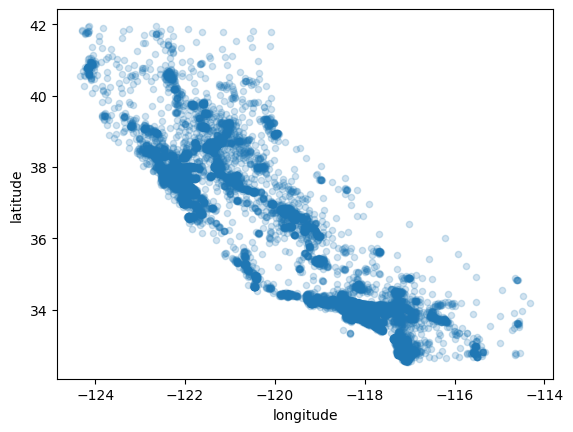

In [19]:
dados_exploracao.plot(kind="scatter",x = "longitude",y = "latitude", alpha = 0.2)

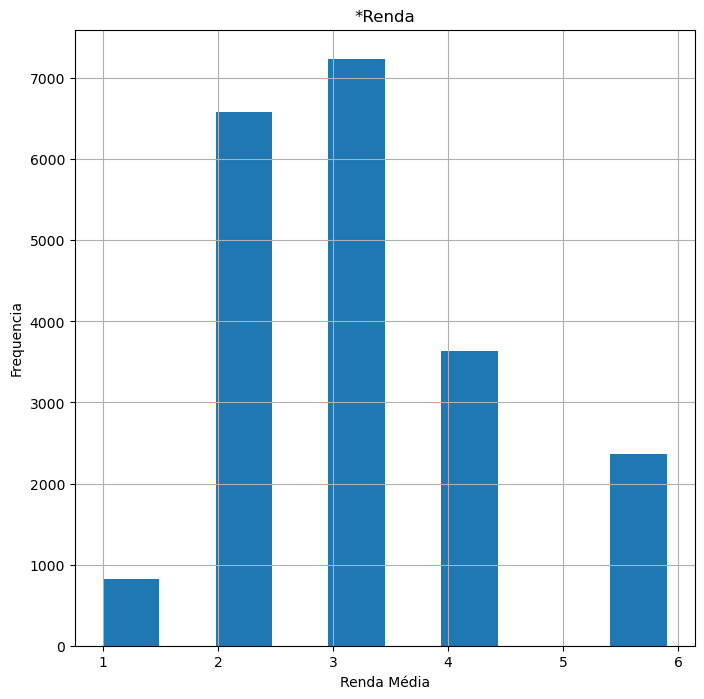

In [29]:
df["Categoria"] = np.ceil(df["median_income"]/1.5)
df["Categoria"].where(df["Categoria"]<5,5.9,inplace=True)
df["Categoria"].hist(bins=10,figsize=(8,8))
plt.xlabel("Renda Média")
plt.ylabel("Frequencia")
plt.title("*Renda")
plt.show()  

In [28]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Categoria
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.9
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.9
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.9
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


In [27]:
df["Categoria"].value_counts()

Categoria
3.0    7236
2.0    6581
4.0    3639
5.9    2362
1.0     822
Name: count, dtype: int64

In [30]:
# Criando uma Amostragem Estratificada Mantendo a Proporção de Amostras com Base na Renda

from sklearn.model_selection import StratifiedShuffleSplit

selecao = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for indexacao_teste, teste_index in selecao.split(df, df["Categoria"]):
    amostra_de_treinamento = df.loc[indexacao_teste]
    amostra_de_teste = df.loc[teste_index]
    

In [37]:
representacao = pd.DataFrame((amostra_de_treinamento["Categoria"].value_counts()/len(amostra_de_treinamento))*100)

In [38]:
# Verificando se a proporção da Amostragem é equivalente com o Conjunto Real

representacao["Real"] = df["Categoria"].value_counts()/len(df)*100

In [39]:
representacao

,count,Real
Categoria,,
3.0,35.059351,35.058140
2.0,31.885901,31.884690
4.0,17.629603,17.630814
5.9,11.446221,11.443798
1.0,3.978924,3.982558


Revisão - Os tipos de Viéses de Amostragem de Dados:

Viés de Amostragem: Ocorre quando uma amostra de dados não tem capacidade de exprimir estatísticas confiáveis a respeito de uma população.

Ex: A seleção amostral de maneira aleatória no modelo de treinamento poderia apresentar um enviesamento devido a ausencia de alguma categoria referente a renda média. O que comprometeria a capacidade do modelo representar dados fora da amostragem (overfitting)

Viés de Observação: Ocorre quando diferentes observadores de algum tipo de fenômeno possuem diferentes observações. Ex: Erro de medição

Viés de Confirmação: Cada observador analisa o fenômeno e interpreta a sua maneira

Analisando Dasdos Geográficos

In [42]:
dados_estudo = df.copy()

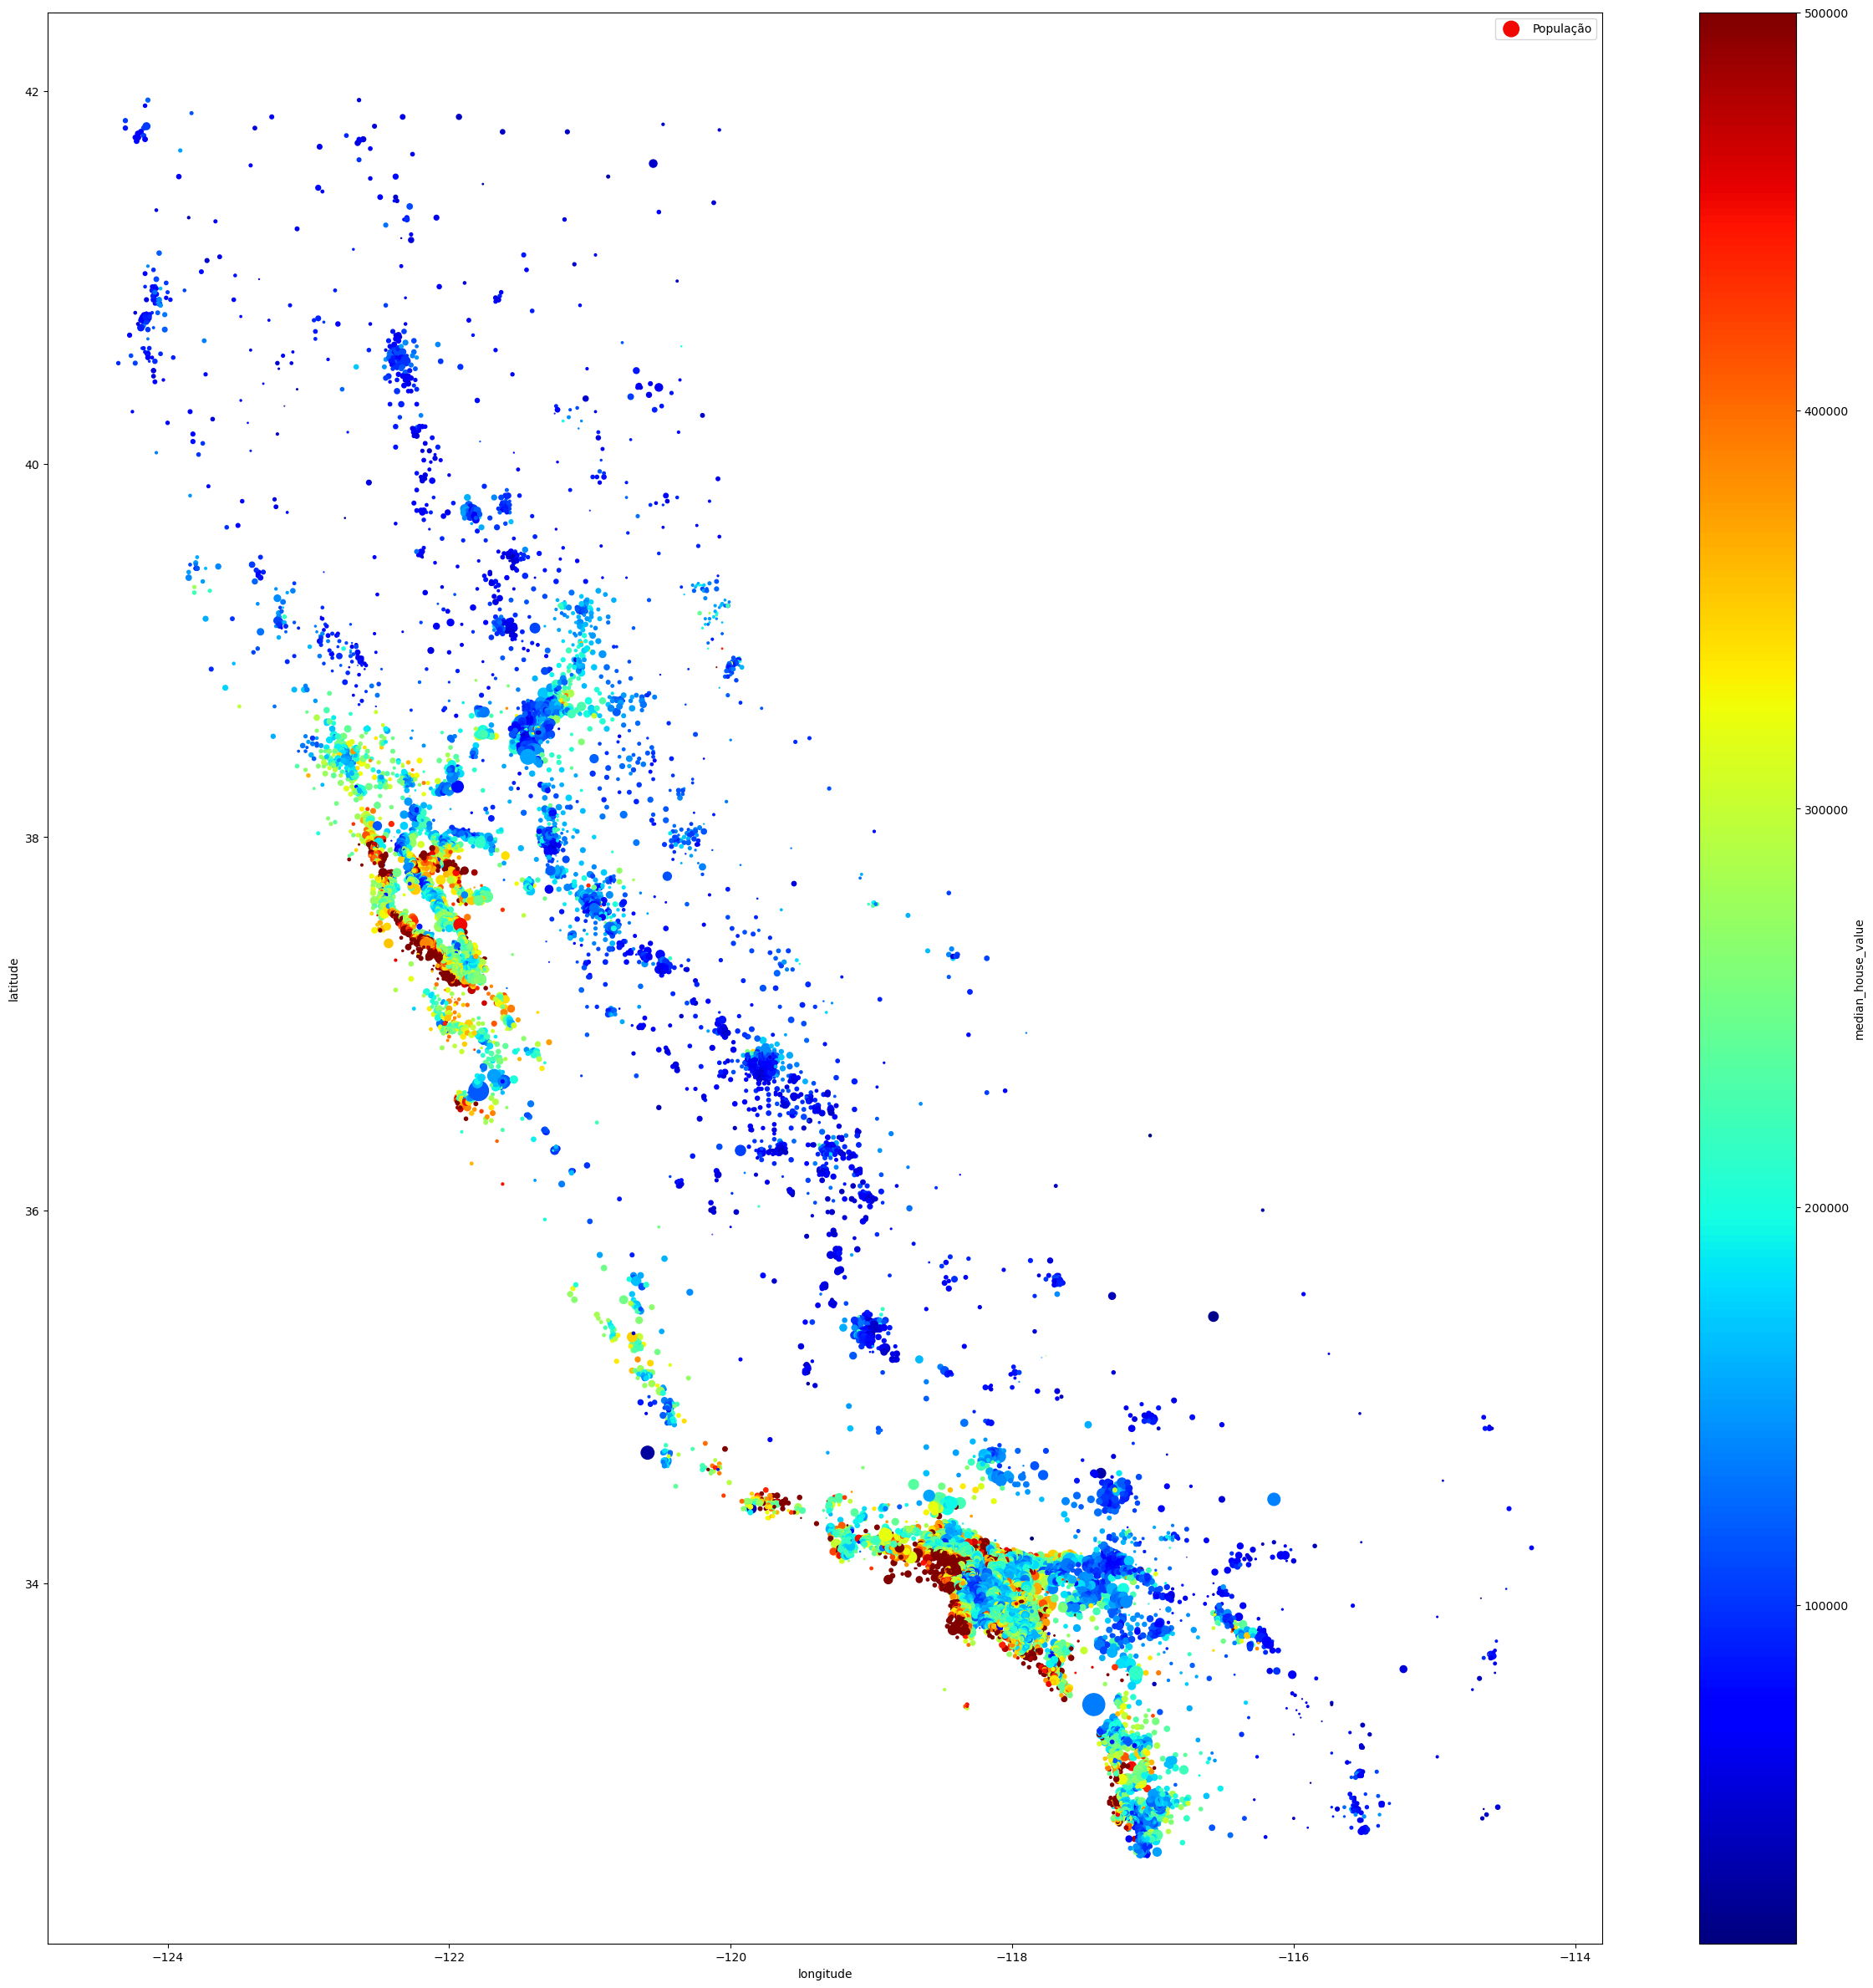

In [58]:
dados_estudo.plot(
    kind="scatter",
                  x="longitude",
                  y="latitude",
                  alpha=1,
                  s =dados_estudo["population"]/100,
                  label="População",
                  figsize=(30,30),
                  c = "median_house_value",
                  cmap=plt.get_cmap("jet"),
                  colorbar=True
                  )
plt.legend()

In [69]:
matriz_de_correlacao = df.corr(numeric_only=float)
matriz_de_correlacao

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Categoria
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.010435
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.082452
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.142108
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.212023
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.006232
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.018930
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.027927
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.916366
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.657073
Categoria,-0.010435,-0.082452,-0.142108,0.212023,0.006232,0.018930,0.027927,0.916366,0.657073,1.000000


In [67]:
matriz_de_correlacao = df.corr(numeric_only=float)

(matriz_de_correlacao["median_house_value"].sort_values(ascending=False))*100


median_house_value    100.000000
median_income          68.807521
Categoria              65.707296
total_rooms            13.415311
housing_median_age     10.562341
households              6.584265
total_bedrooms          4.968618
population             -2.464968
longitude              -4.596662
latitude              -14.416028
Name: median_house_value, dtype: float64

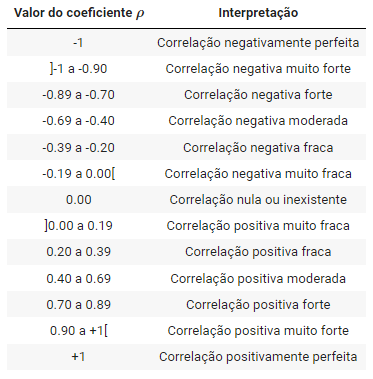

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='population', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='population', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='population'>,
        <Axes: xlabel='median_income', ylabel='population'>,
        <Axes: xlabel='population', ylabel='population'>]], dtype=object)

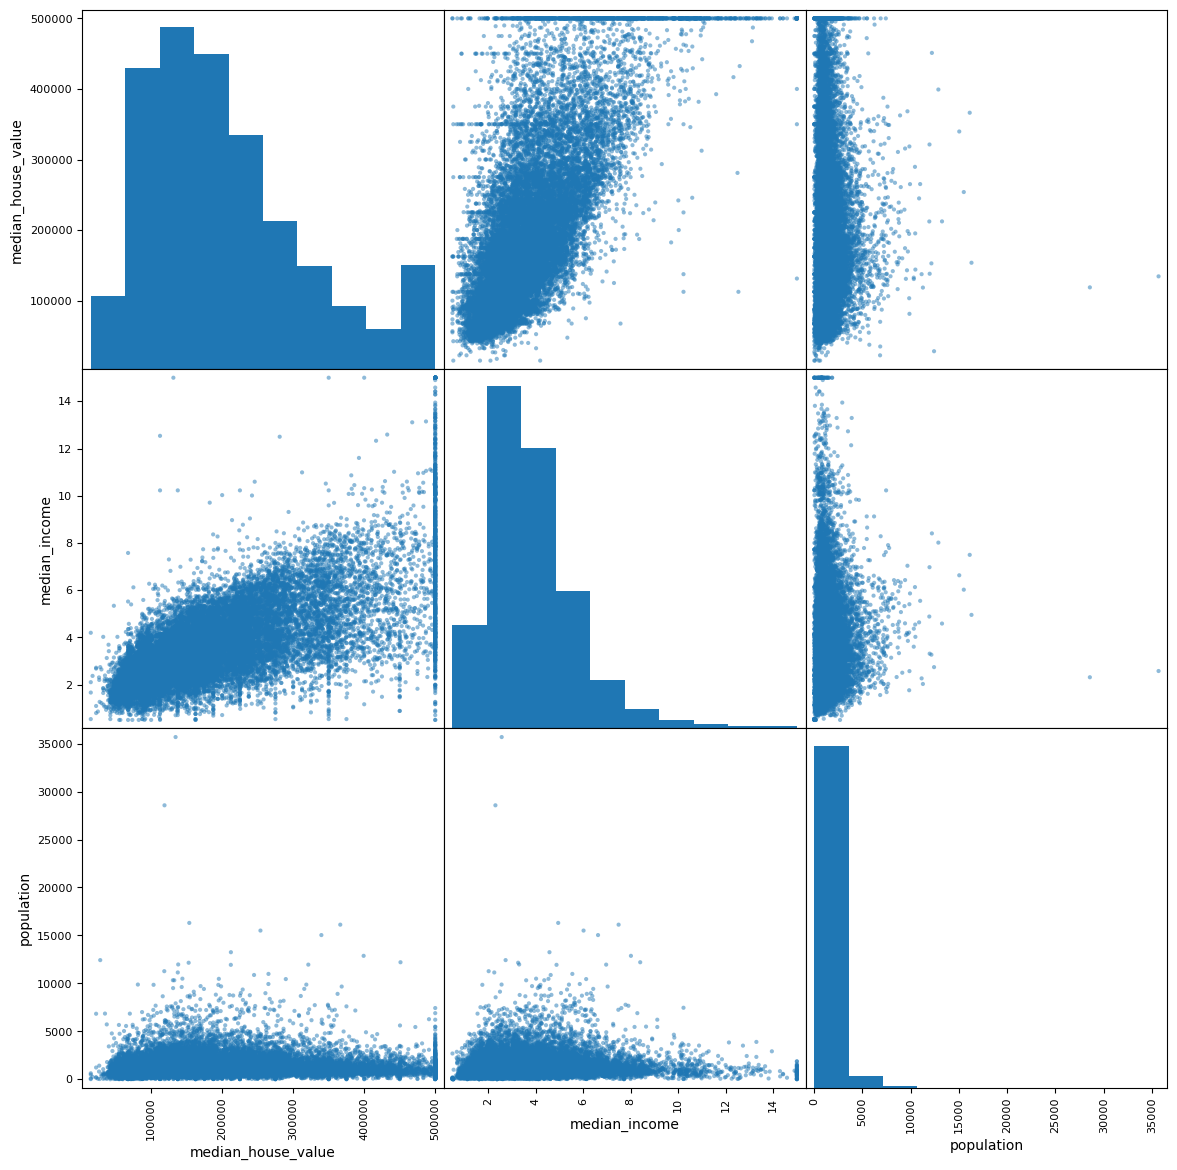

In [72]:
from pandas.plotting import scatter_matrix

variaveis = ["median_house_value","median_income","population"]
scatter_matrix(df[variaveis],figsize=(14,14), grid=True)

<Axes: xlabel='median_income', ylabel='median_house_value'>

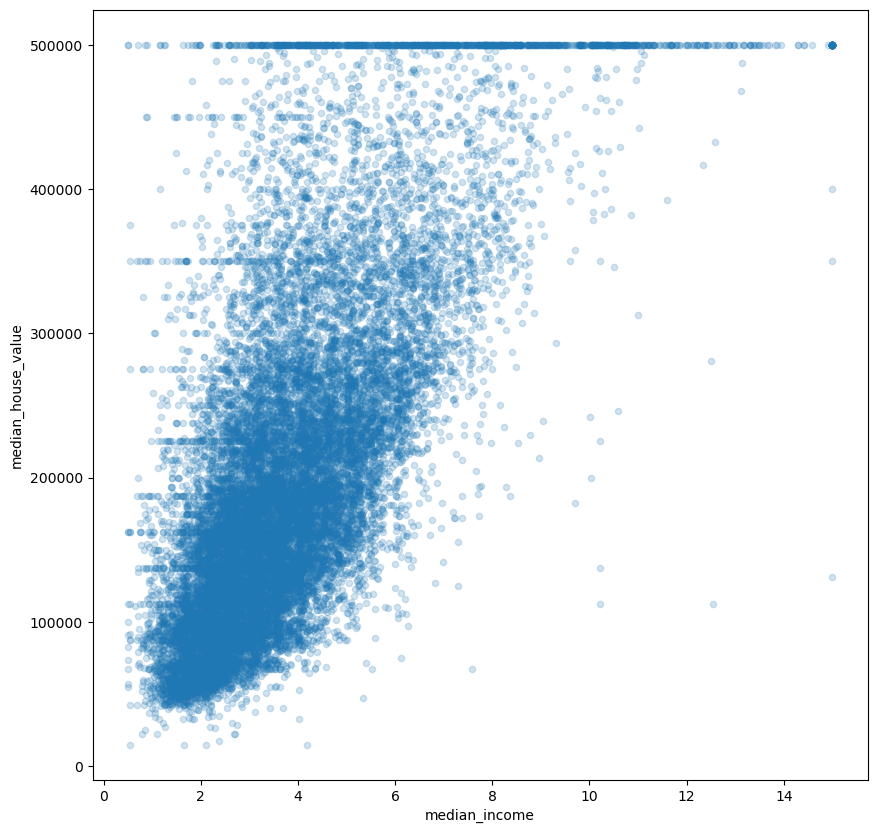

In [77]:
df.plot(kind="scatter", x="median_income",y="median_house_value", figsize=(10,10), alpha = 0.2)

Entendimento do Problema:

Compreender claramente o problema que está sendo abordado.
Definir claramente os objetivos da análise exploratória de dados.
Obtenção dos Dados:

Identificar e obter os conjuntos de dados relevantes.
Verificar a integridade e qualidade dos dados.
Exploração Inicial dos Dados:

Examinar as primeiras linhas do conjunto de dados para entender a estrutura.
Verificar o tipo de cada variável (numérica, categórica, etc.).
Identificar o número de amostras e características (linhas e colunas).
Verificar se há valores ausentes e decidir como tratá-los, se necessário.
Calcular estatísticas resumidas (média, mediana, desvio padrão, etc.) para variáveis numéricas.
Análise Univarida:

Explorar cada variável individualmente.
Para variáveis numéricas: histogramas, boxplots, estatísticas descritivas.
Para variáveis categóricas: contagem de valores, gráficos de barras.
Análise Bivariada:

Investigar relações entre pares de variáveis.
Para pares de variáveis numéricas: gráficos de dispersão, matriz de correlação.
Para pares de variáveis numéricas e categóricas: gráficos de caixa por grupo, testes de hipóteses.
Análise Multivariada:

Explorar relações entre três ou mais variáveis.
Utilizar técnicas como mapas de calor de correlação, análise de componentes principais (PCA), etc.
Visualização de Dados:

Utilizar visualizações adequadas para apresentar os resultados da análise.
Escolher gráficos que enfatizem os padrões e insights identificados.
Identificação de Padrões e Anomalias:

Identificar padrões interessantes nos dados.
Procurar por valores atípicos (outliers) que possam ser erros ou fenômenos significativos.
Iteração e Aprofundamento:

Iterar sobre os passos anteriores conforme necessário.
Investigar áreas de interesse em mais detalhes.
Refinar questões e hipóteses à medida que novos insights são descobertos.
Documentação e Comunicação:

Documentar todas as etapas da análise exploratória de dados.
Preparar um relatório ou apresentação resumindo os principais resultados.
Comunicar insights de forma clara e compreensível para as partes interessadas.